In [1]:
from sklearn.metrics import mean_squared_error

from create_matrix import *


def get_tensor(df, start, stop):
#     start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    dfc = df.copy()

    df = dfc[energy_cols]

    tensor = df.values.reshape((len(df), 7, stop - start))
    return tensor


# def create_region_df_dfc_static(region, year):
#     df, dfc = create_matrix_single_region(region, year)
#     tensor = get_tensor(df, start, stop)
#     static_region = df[['area', 'total_occupants', 'num_rooms']].copy()
#     static_region['area'] = static_region['area'].div(4000)
#     static_region['total_occupants'] = static_region['total_occupants'].div(8)
#     static_region['num_rooms'] = static_region['num_rooms'].div(8)
#     static_region = static_region.values
#     return df, dfc, tensor, static_region



In [23]:
import pickle
H_au = pickle.load(open(os.path.expanduser('/home/yj9xs/git/scalable-nilm/aaai18/predictions/case-2-graph_Austin_True_1_13_Hs.pkl'), 'r'))


In [26]:
H_sd = pickle.load(open(os.path.expanduser('/home/yj9xs/git/scalable-nilm/aaai18/predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0.pkl'), 'r'))

In [28]:
np.argmin(H_sd['Error'])

1

In [31]:
lr, iters, home, season, lam = H_sd['Learning Params'][1]

In [114]:
H_sd['Learning Params'][1]

[0.1, 1300, 2, 3, 0.001]

In [57]:
H_sandiego = H_sd['H'][lr][iters][home][season][lam]
H_austin = H_au[lr][home][season][lam][iters]
H_sandiego = pd.DataFrame(pd.concat(H_sandiego))
H_sandiego = H_sandiego.values

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [105]:
X = np.r_[H_austin, H_sandiego]

In [106]:
X

array([[ 1.44978439,  1.85235149,  2.24196778],
       [ 5.07829371,  5.19002611,  5.31706703],
       [ 1.25873953,  1.91841413,  2.01917777],
       ..., 
       [ 3.91653929,  4.54876306,  4.20064527],
       [ 3.54303754,  2.33810825,  4.02175073],
       [ 1.79951822,  0.7918247 ,  3.57216809]])

In [107]:
y_pred = KMeans(n_clusters=5, random_state=0).fit_predict(X)

In [108]:
y_sd = np.zeros(39)
y_au = np.ones(len(H_austin))

In [110]:
y_label = np.r_[y_au, y_sd]

In [146]:
result = pickle.load(open(os.path.expanduser('./result.pkl'), 'r'))
result = np.around(result.values)

In [147]:
result

array([ 17.,  20.,  28.,  18.,  26.,  17.,  15.,  16.,  22.,  19.,  25.,
        12.,  17.,  20.,  18.,   8.,  12.,  18.,   5.,  11.,   2.,  12.,
        22.,  17.,  15.,   4.,  22.,  24.,  15.,  24.,  14.,  11.,  17.,
        17.,  27.,  22.,  28.,  11.,  14.])

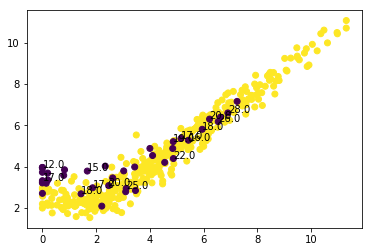

In [156]:

start = len(H_austin)
d = np.random.randint(0, 2, size=(3,3,3))
z,x,y = d.nonzero()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)
ax.scatter(X[:, 1], X[:, 2], c= y_label)
# ax.scatter(X[:, 2], X[:, 0], X[:,1], zdir='z', c= y_label)

for i in range(start, start + 15):
    ax.annotate(result[i-start], (X[i, 1],X[i, 2]))

plt.savefig("demo.png")